In [17]:
import pandas as pd
import trafilatura
import markdown

In [21]:
path = r"C:\repos\search-summaries\dataset\unified_dataset.csv"

df = pd.read_csv(path)
df.columns
print(df.shape)

(340, 7)


In [28]:
def clean_markdown(raw_markdown):
    html = markdown.markdown(raw_markdown, extensions=['extra'])
    cleaned = trafilatura.extract(
        html,
        include_comments=False,
        include_tables=False,
        deduplicate=True,
        favor_precision=True
    )
    return cleaned

Average length of raw_markdown: 71468.2088235294
number of rows with length < 6KB: 71


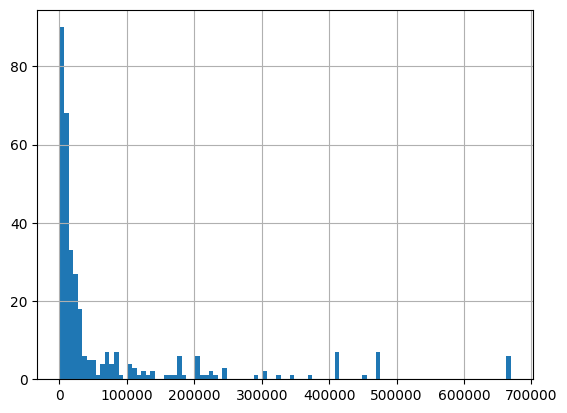

In [26]:
# hist of length column of raw_markdown
df['length'].hist(bins=100)

# print average length of raw_markdown
print("Average length of raw_markdown:", df['length'].mean())

In [29]:
# create a new column with cleaned markdown
df['cleaned_markdown'] = df['raw_markdown'].apply(clean_markdown)

In [39]:
# count rows where cleaned_markdown is None
count_none = df['cleaned_markdown'].isnull().sum()
print("Number of rows with cleaned_markdown as None:", count_none)

# drop rows where cleaned_markdown is None
df = df.dropna(subset=['cleaned_markdown'])

# print statistics of cleaned markdown length
print("Average length of cleaned_markdown:", df['cleaned_markdown'].apply(len).mean())


print(f"number of rows with length < 8K: {df[df['length'] < 8000].shape[0]}")
print(f"number of rows with cleaned_markdown length < 8K: {df[df['cleaned_markdown'].apply(len) < 8000].shape[0]}")

# filter rows with cleaned_markdown length > 8K
df_filtered = df[df['cleaned_markdown'].apply(len) < 8000]

print(f"number of rows after filtering: {df_filtered.shape[0]}")
print(f"average length of cleaned_markdown after filtering: {df_filtered['cleaned_markdown'].apply(len).mean()}")


Number of rows with cleaned_markdown as None: 0
Average length of cleaned_markdown: 19402.373088685013
number of rows with length < 8K: 96
number of rows with cleaned_markdown length < 8K: 198
number of rows after filtering: 198
average length of cleaned_markdown after filtering: 3567.848484848485


In [38]:
# save the cleaned dataframe to a new csv file
output_path = r"C:\repos\search-summaries\dataset\cleaned_unified_dataset.csv"
df_filtered.to_csv(output_path, index=False)
